<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# We are going to use hand written digit sets from kairas' library, 
# and you can load that with keras.datasets.mnist.load_data().
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Shows there are 6000 images in the training data.
len(X_train)

60000

In [4]:
# Shows there are 1000 image in the testing data.
len(X_test)

10000

In [5]:
# Shows 28 by 28 piel image. See the output of next block.
X_train[0].shape

(28, 28)

In [6]:
# Showing 0 (white) to 255 (black) in the 28 X 28 two dimentional array.
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

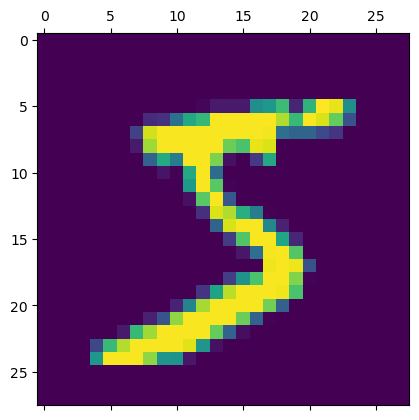

In [9]:
# Ploting above 28 x 28.Inposition zero, the image is 5.
plt.matshow(X_train[0])

In [12]:
# In position zero, the image is 5 as above image shows.
y_train[0]

5

In [13]:
# Our value isn't scale sofar. We often need to scale the value
# in the machine learning. Since each value is in the scale of
# 0 to 255, so if I divide this whole array by 255, it will be 
# scaled from 0 to 1.
# Scalig techniques improves the accuracy of machine learning.
X_train = X_train / 255
X_test = X_test / 255

In [14]:
# Now you see the value is from 0 to 1.
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
# X_train.shape will output (60000, 28, 28). The first one is the number
# of image that you got, second one and third one are the dimention of
# each image that is 28 x 28.
X_train.shape

(60000, 28, 28)

In [16]:
# To flatten two dementional array to one dimentional array.
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
# the number 784 represents for 28 x 28.
X_train_flattened.shape

(60000, 784)

In [18]:
# This shows flattened array of 784 in the first image.
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [19]:
# Sequential means I am going to have a stack of layers 
# in my neural network. Since it is a stak, it will accept every layer
# as one element so that first element here is input but Keras has this
# API where you can say keras.layers.Dense.
# Dense means all the neurons in one layer are connected with every
# other neuron in the subsequest layer.That's why it is called Dense
# and I am creating a dence layer here.
# input_shape is 784. Output shape is 10, means we have 10 output neurons.
# So here you are defining both input and output layer basically.
# You need to specify activation function which is Sigmoid.


# Define the neural network and store in the variable called "model"
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


# We need to compile the model.When you compile, you need to pass
# bunch of arguments. 
# The first argument is Optimizer.I am using 'adam' optimizer.
# The optimizer allows you to train efficiently. When the backward 
# propagation and the training is going on, optimizer will allow you
# to reach to global optima in efficient way.
# The second parameter is 'loss'. "loss" function See "what is Machine  https://www.youtube.com/watch?v=8jazNUpO3lQ&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=2
# Learning" video No2. Linear Regression Single Variable. Here, we will
# use 'sparse_categorical_crossentropy'. This means our output class 
# are categorical because we have categories 0 to 9.- We have 10
# classes in our output.
# The 'sparse' means our output variable which is y_train 
# an integer number. If it is one-hot encoded array, you would probably
# use 'categorical_crossentropy', and not 'sparse_categorical_crossentropy'.
# Ours are not one hot encoded array.
# (see TensorFlow doc under "losses"> "overview") You can also see
# "What is Machine Learning"tutorial No 4. "Gradient Descent and Cost https://www.youtube.com/watch?v=vsWrXfO3wWw&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=4
# Function"
# Metrics, you are sayins 'accuracy'which is the metrics you are
# going to use.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Then you can call model.fit.
# The "fit" is where the training actually happens.So you are supplying
# here the training set.
# X-train is flattened, but y_train isn't because it is a simple array.
# Epoch is number of iteration for which your neural network is going
# to run the training.
# When you rudn this you will see 5 epochs, and each time accuracy 
# increases.
model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 2s 859us/step - loss: 0.4722 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 2s 817us/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 843us/step - loss: 0.2833 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 2s 839us/step - loss: 0.2736 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.2664 - accuracy: 0.9255


In [20]:
# Lets evaluate the accuracy by using X_test_flattened data set.
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 786us/step - loss: 0.2692 - accuracy: 0.9242


[0.2691948413848877, 0.9241999983787537]

In [21]:
# For fun, check the prediction.
# When you predict, you will need to pass whoel value X_test_flattened
# into the predict() function, because passing the first value 
# like this model.predict(X_test_flattened[0]) would not work.
# After passing that, you can call the first by value y_predicted[0].
# The output is 10 scores as we know that output will be 0 to 9.
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 765us/step


array([1.74550582e-02, 3.56372141e-07, 4.98601794e-02, 9.40940440e-01,
       2.38520605e-03, 1.12557031e-01, 1.41541386e-06, 9.99693215e-01,
       1.08178556e-01, 6.57925129e-01], dtype=float32)

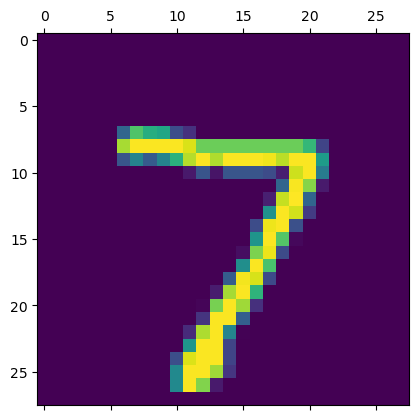

In [22]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [23]:
# The function np.argmax() finds the maximum value and print the
# maximum value in that index.

np.argmax(y_predicted[0])

7

In [24]:
# Create an array of labels.In this case it is 0 to 9, however
# it could be an intent name in the case of chatbot.
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
# Draw a confusion matrix.
# Make sure to pass the label to Predictions, like y_predicted_labels.

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    6,    8,    2,    3,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,   10,  923,   15,    7,    4,   11,    9,   47,    3],
       [   2,    0,   24,  910,    1,   31,    2,    9,   23,    8],
       [   1,    1,    9,    1,  909,    0,    9,    3,   14,   35],
       [   7,    3,    6,   21,    7,  793,   11,    4,   34,    6],
       [  11,    3,   10,    1,    7,   18,  902,    2,    4,    0],
       [   1,    9,   23,   11,    8,    1,    0,  930,    7,   38],
       [   4,    6,    6,   19,    9,   22,    8,    5,  888,    7],
       [   8,    8,    2,   10,   28,    8,    0,   13,   12,  920]])>

Text(95.72222222222221, 0.5, 'Truth')

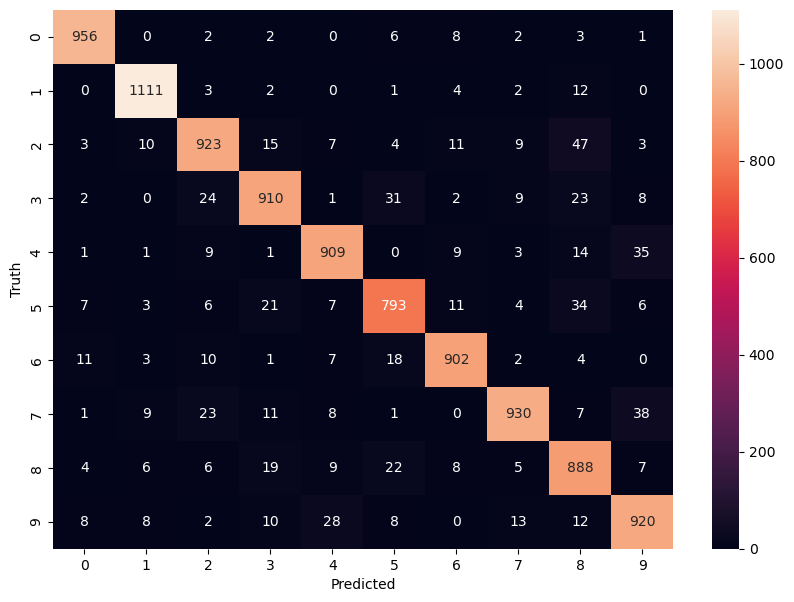

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [28]:
# When you add hidden layer in the training model, it generally
# improves the model.
# In the second layer, you don't need to add input_shape becuase
# the Karas knows it from the previous layer.
# IN the first layer, you will need to specify hidden layer.Specify
# how many neurons you want. It is sort of trial and error, but 
# start with some value like 100, which is less than input shape.
# For the activation function for the first layer, Use "relu"

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2772 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1220 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0846 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0644 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0501 - accuracy: 0.9845


In [29]:
# Now Acuracy with hidden layer is 0.97...This is buch better in
# comparison with 0.92...without the hidden layer.
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 836us/step - loss: 0.0752 - accuracy: 0.9764


[0.07516813278198242, 0.9764000177383423]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

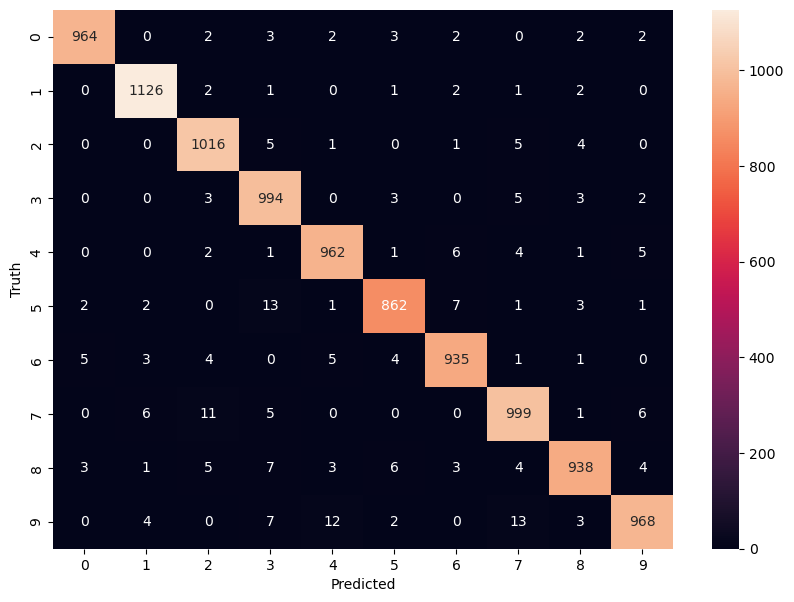

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [31]:
# Add hidden layer to improve performance.
# no longer need model.fit(X_train_flattened, y_train, epochs=5) ,instead
# you can only write model.fit(X_train, y_train, epochs=10).
# You can use keras.layers.Flatten(input_shape=(28, 28)) to flatten, and
# Subrequest layers, you don't have to use imput_shape = (784,) because
# input_shape=(28, 28) in the first elemet of keras.Sewuential()
# Takes care of it.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.9245
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1237 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0882 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0675 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0531 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0435 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 797us/step - loss: 0.0819 - accuracy: 0.9775


[0.08186439424753189, 0.9775000214576721]

------

EXERSICE:
- Try different losses (SEE Tensorflow docs under losses)
- Try ifferent input shapes
- Try different epochs

Using above, can you make the acuracy higher than 0.9779?

## Experiment 1 - 'categorical_crossentropy'

##### Following I used loss function 'categorical_crossentropy'. First I got a error message:ValueError: Shapes (32, 1) and (32, 10) are incompatible. It is because 'categorical_crossentropy', my target data (y_train, and Y_test) should be one-hot encoded. If my target isn't one-hot encoded, I should use loss function 'sparse_categorical_crossentropy' like Dhaval Patel used in above tutorial.

One-hot encoding is a process used to convert categorical data variables into a form that could be provided to machine learning algorithms to improve predictions¹³. 

In one-hot encoding, each category of a categorical variable is converted into a new binary feature (0 or 1)¹²⁴. For example, if you have a categorical variable "color" with three categories "red", "blue", and "green", one-hot encoding will create three new variables (one for each category). If the color is red, the "red" variable will be 1 and the "blue" and "green" variables will be 0.

In [35]:
# To convert y_train into one-hot encoding.

from tensorflow.keras.utils import to_categorical

# Assuming y_train are your targets
y_train_one_hot = to_categorical(y_train, num_classes=10)

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2656 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1180 - accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0819 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0617 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0390 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0314 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0264 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.017

In [38]:
# To convert y_test to one hot coding

from tensorflow.keras.utils import to_categorical

# Assuming y_train are your targets
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [40]:
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 0s 939us/step - loss: 0.0788 - accuracy: 0.9792


[0.07881028205156326, 0.979200005531311]

313/313 [==============================] - 0s 895us/step


Text(95.72222222222221, 0.5, 'Truth')

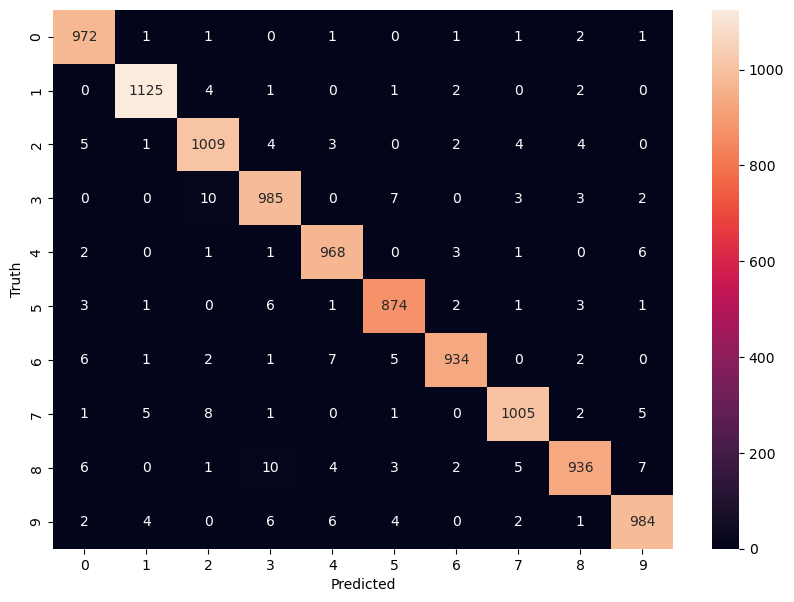

In [42]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### As docs suggested, change optimizer from 'adam', to 'sgd'. - Results are not great. Accuracy went doen to .95.
##### So the second try is the increased epoch to 15, but still not great. Needed to increase up to 30 to go over .97.

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6782 - accuracy: 0.8290
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3409 - accuracy: 0.9042
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2916 - accuracy: 0.9169
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2610 - accuracy: 0.9267
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2380 - accuracy: 0.9336
Epoch 6/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.2192 - accuracy: 0.9390
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2037 - accuracy: 0.9434
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1903 - accuracy: 0.9465
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1789 - accuracy: 0.9499
Epoch 10/10
1875/1875 [==============================] - 2s 992us/step - loss: 0

In [45]:
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 0s 894us/step - loss: 0.1624 - accuracy: 0.9538


[0.16239628195762634, 0.9538000226020813]

313/313 [==============================] - 0s 924us/step


Text(95.72222222222221, 0.5, 'Truth')

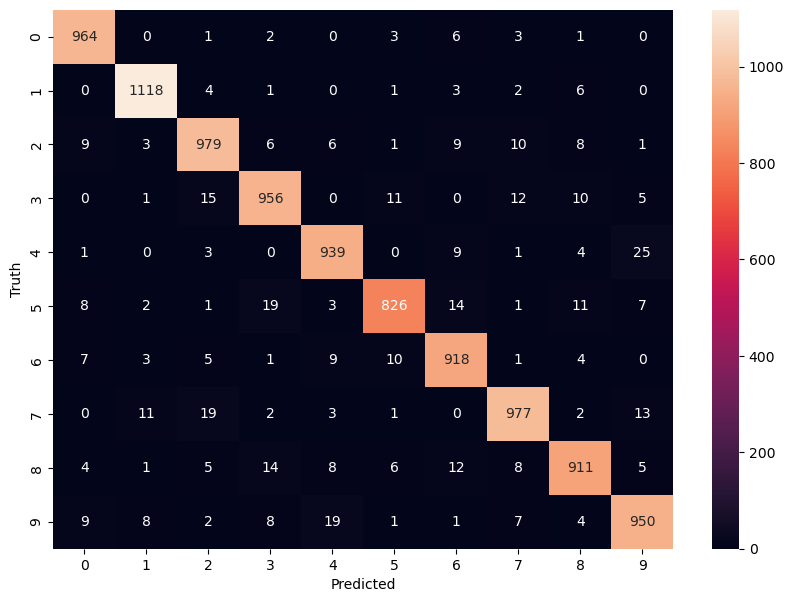

In [46]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 2s 980us/step - loss: 0.6841 - accuracy: 0.8267
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3444 - accuracy: 0.9037
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2972 - accuracy: 0.9163
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2673 - accuracy: 0.9243
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2440 - accuracy: 0.9321
Epoch 6/30
1875/1875 [==============================] - 2s 998us/step - loss: 0.2247 - accuracy: 0.9369
Epoch 7/30
1875/1875 [==============================] - 2s 958us/step - loss: 0.2083 - accuracy: 0.9420
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1940 - accuracy: 0.9462
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1817 - accuracy: 0.9490
Epoch 10/30
1875/1875 [==============================] - 2s 992us/step - los

### Experiment 2 - 'categorical_focal_crossentropy'

the labels must be one-hot coded representation.
The results are incredible!
focal: adjust class inbalances automatically during ML so that you don't have to use class_weights.

In [67]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_focal_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0361 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0147 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0096 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0070 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0053 - accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0041 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0035 - accuracy: 0.9880
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0027 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.002

In [68]:
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 0s 933us/step - loss: 0.0106 - accuracy: 0.9765


[0.010568127036094666, 0.9764999747276306]

313/313 [==============================] - 0s 936us/step


Text(95.72222222222221, 0.5, 'Truth')

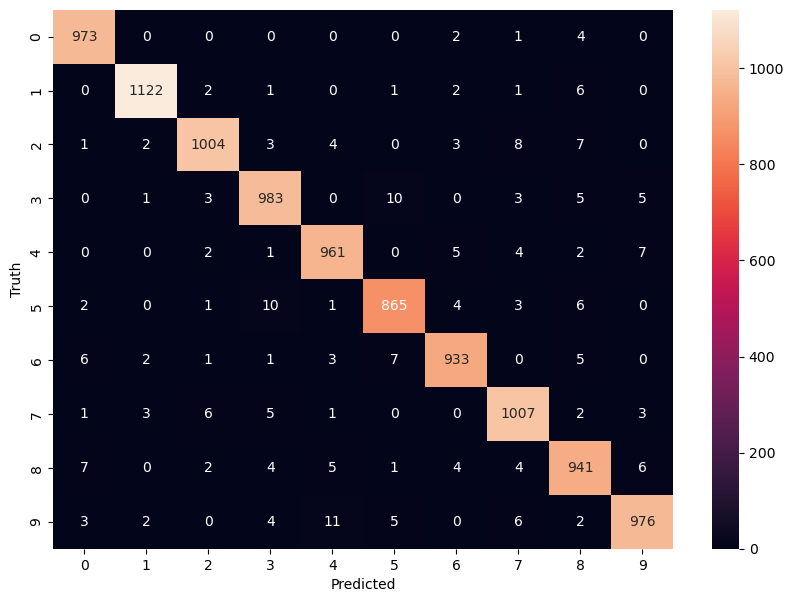

In [69]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Experiment 3  - 'categorical_hinge' 
My question: Since 2 and 7 are always confused, there maybe linearly not separable?
Results: less performed than Experiment 2 - 'categorial_focal_crossentrophy'. The confusiont between 2 and 7 has inclused to 12 from 10.However, the confustion between 4 and 9 has dcreased to 11 from 15.

The Categorical Hinge loss function, also known as categorical margin loss, is used in machine learning for multiclass classification problems. It’s particularly useful when you want to maximize the margin of your classifier.

This loss function is designed to handle cases where the classes are not linearly separable. It tries to find a decision boundary that maximizes the distance (margin) between the instances of different classes. This makes the model more robust to individual variations of instances within each class.

It’s worth noting that the Categorical Hinge loss function is different from the standard Hinge loss function, which is used for binary classification2. The Categorical Hinge loss function extends the concept to multiclass classification

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_hinge',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2623 - accuracy: 0.9082
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1224 - accuracy: 0.9509
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0936 - accuracy: 0.9617
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0774 - accuracy: 0.9679
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0659 - accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0582 - accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0519 - accuracy: 0.9782
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0469 - accuracy: 0.9798
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0429 - accuracy: 0.9815
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.039

In [55]:
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 0s 824us/step - loss: 0.0598 - accuracy: 0.9750


[0.059763941913843155, 0.9750000238418579]

313/313 [==============================] - 0s 777us/step


Text(95.72222222222221, 0.5, 'Truth')

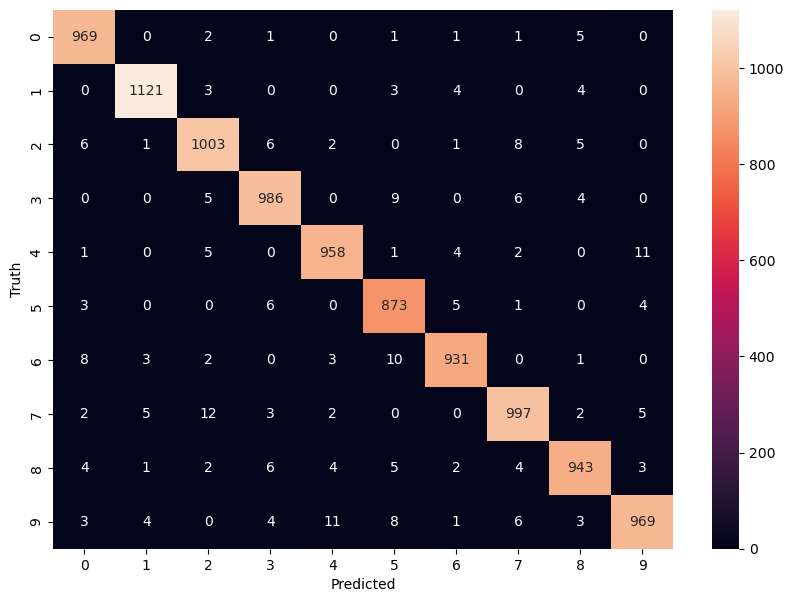

In [56]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Experiment 4 - 'cosine_similarity'

Computes the cosign similarity between the labels and predictions.

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='cosine_similarity',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9249 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9632 - accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9720 - accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9773 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9806 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9829 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9850 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9865 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9878 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - lo

In [58]:
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 0s 868us/step - loss: -0.9754 - accuracy: 0.9705


[-0.97540283203125, 0.9704999923706055]

313/313 [==============================] - 0s 806us/step


Text(95.72222222222221, 0.5, 'Truth')

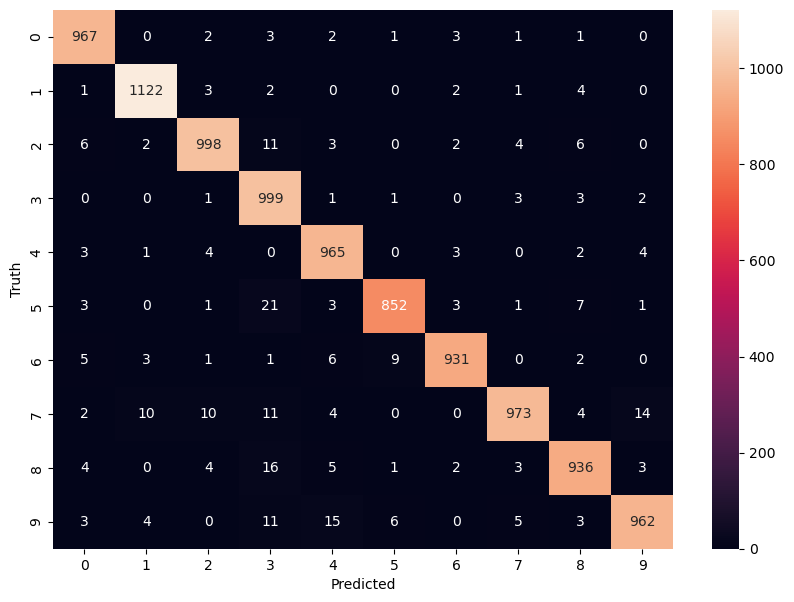

In [59]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Change Epoch to 25 to increase accuracy.

In [71]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='cosine_similarity',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: -0.9223 - accuracy: 0.9181
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9608 - accuracy: 0.9558
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9705 - accuracy: 0.9672
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9769 - accuracy: 0.9750
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9803 - accuracy: 0.9783
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9830 - accuracy: 0.9815
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9852 - accuracy: 0.9840
Epoch 8/25
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9868 - accuracy: 0.9860
Epoch 9/25
1875/1875 [==============================] - 2s 1ms/step - loss: -0.9882 - accuracy: 0.9873
Epoch 10/25
1875/1875 [==============================] - 2s 1ms/step - lo

In [72]:
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 0s 774us/step - loss: -0.9808 - accuracy: 0.9787


[-0.9808313250541687, 0.9786999821662903]

### Experiment 5 - 'binary_crossentropy'

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0642 - accuracy: 0.9077
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0291 - accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0212 - accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0169 - accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0141 - accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0120 - accuracy: 0.9853
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0105 - accuracy: 0.9874
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0091 - accuracy: 0.9896
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0081 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.006

In [61]:
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 864us/step - loss: 0.0166 - accuracy: 0.9798


[0.016600167378783226, 0.9797999858856201]

313/313 [==============================] - 0s 872us/step


Text(95.72222222222221, 0.5, 'Truth')

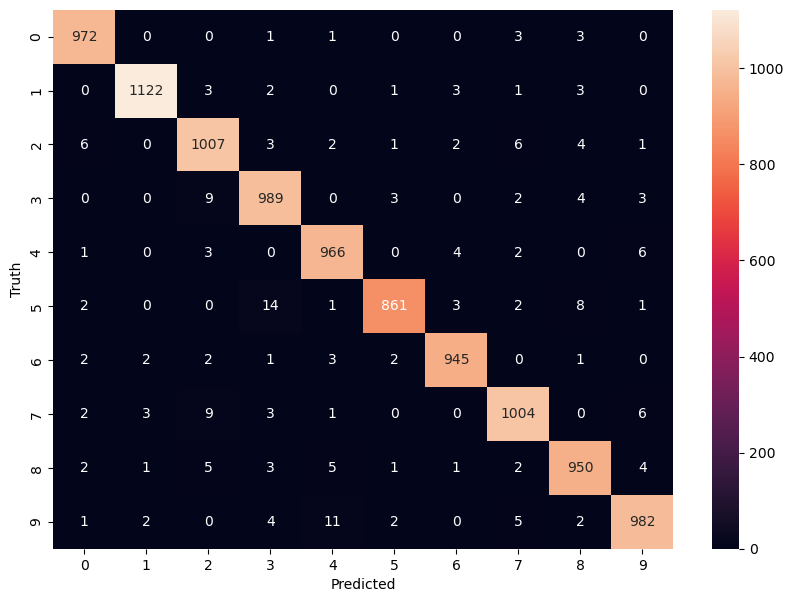

In [62]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Experiment 6 - 'binary_focal_crossentropy'

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_focal_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0144 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0065 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0048 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0038 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0031 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0026 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.001

In [64]:
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 0s 827us/step - loss: 0.0056 - accuracy: 0.9795


[0.005609259009361267, 0.9794999957084656]

313/313 [==============================] - 0s 805us/step


Text(95.72222222222221, 0.5, 'Truth')

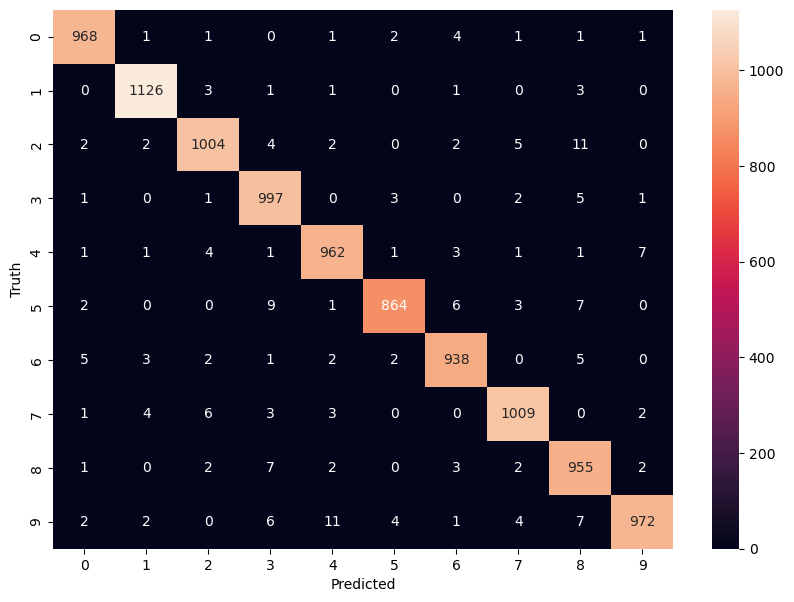

In [65]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')